In [2]:
%load_ext autoreload
%autoreload 2
import os
import torch as t
from utils.config import opt
from model import FasterRCNNVGG16
from trainer import FasterRCNNTrainer
from data.util import  read_image
from utils.vis_tool import vis_bbox
from utils import array_tool as at
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def pic_show(path):
    imgs=Image.open(path)
    plt.imshow(imgs)
def bbox_show(path):
    img=read_image(path)
    img=t.from_numpy(img)[None]
    print('img.size',img.size)
    faster_rcnn=FasterRCNNVGG16()
    trainer=FasterRCNNTrainer(faster_rcnn).cuda()
    trainer.load("/root/yanjing/NN/simple-faster-rcnn-pytorch-master/checkpoints/fasterrcnn_05090636_0.6993159978068522")
    _bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
    vis_bbox(at.tonumpy(img[0]),
     at.tonumpy(_bboxes[0]),
     at.tonumpy(_labels[0]).reshape(-1),
     at.tonumpy(_scores[0]).reshape(-1))

img.size <built-in method size of Tensor object at 0x7f5548c43a20>
img.size <built-in method size of Tensor object at 0x7f5549539cf0>
img.size <built-in method size of Tensor object at 0x7f5548bdf318>


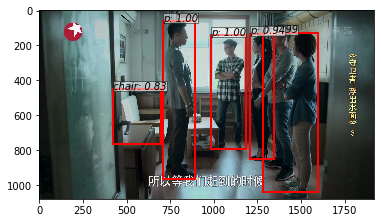

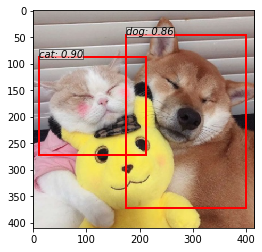

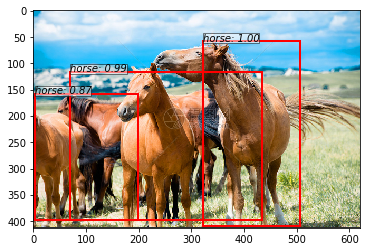

In [5]:
path="/root/yanjing/NN/simple-faster-rcnn-pytorch-master/image"
bbox_show("/root/yanjing/NN/simple-faster-rcnn-pytorch-master/image/a.jpg")
bbox_show("/root/yanjing/NN/simple-faster-rcnn-pytorch-master/image/dog_cat.png")
bbox_show("/root/yanjing/NN/simple-faster-rcnn-pytorch-master/image/horse.png")

img.size <built-in method size of Tensor object at 0x7f27522b2120>
img.size <built-in method size of Tensor object at 0x7f2755607048>
img.size <built-in method size of Tensor object at 0x7f275230b3f0>
img.size <built-in method size of Tensor object at 0x7f275239caf8>


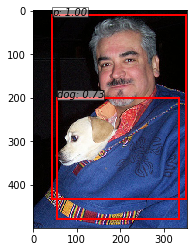

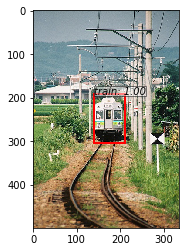

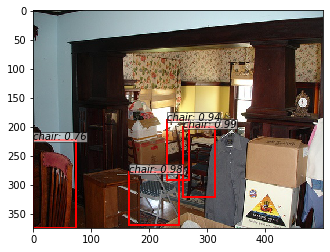

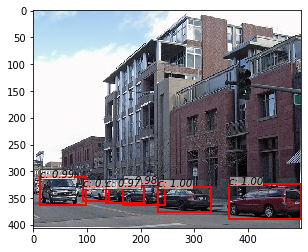

In [5]:
#测试集图片可视化
path='/root/yanjing/NN/simple-faster-rcnn-pytorch-master/VOCdevkit/VOCdevkit/VOC2007/JPEGImages/'
imgs=[path+'000001.jpg',path+'000002.jpg',path+'000005.jpg',path+'000004.jpg']
for img in imgs:
    bbox_show(img)